In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [3]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers (1).csv to Mall_Customers (1).csv


In [6]:
df = pd.read_csv('Mall_Customers (1).csv')
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
from sklearn.preprocessing import StandardScaler

# Select only the numeric features you want to scale
# Example: all columns except categorical ones
features = df.select_dtypes(include=[np.number])

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Optional: create a new DataFrame with the scaled values
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Preview the result
scaled_df.head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980


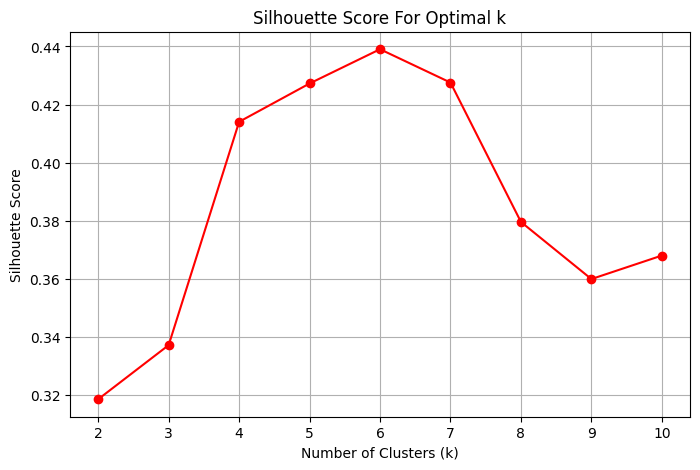

In [9]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)  # silhouette score needs at least 2 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.grid(True)
plt.show()


In [10]:
from sklearn.cluster import KMeans

# Define the number of clusters
k = 6
# Replace with the optimal number you determined

# Apply KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# View with cluster assignments
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


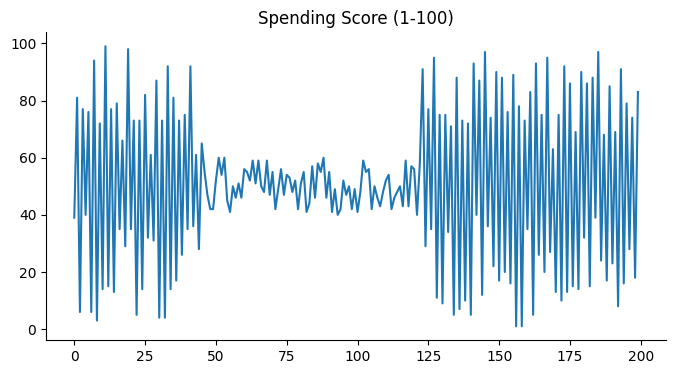

In [11]:
# @title Spending Score (1-100)

from matplotlib import pyplot as plt
df['Spending Score (1-100)'].plot(kind='line', figsize=(8, 4), title='Spending Score (1-100)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [12]:
# Fit KMeans and get cluster labels
kmeans = KMeans(n_clusters=6, random_state=42)  # Replace 6 with your optimal k
cluster_labels = kmeans.fit_predict(scaled_df)

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

# Preview the updated DataFrame
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [14]:
# Group by cluster and compute the mean for only numeric columns
df.groupby('Cluster').mean(numeric_only=True)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,82.022727,56.340909,53.704545,49.386364
1,162.000000,32.692308,86.538462,82.128205
2,23.041667,25.250000,25.833333,76.916667
3,164.428571,41.685714,88.228571,17.285714
4,23.190476,45.523810,26.285714,19.380952
5,91.297297,26.891892,57.135135,48.810811


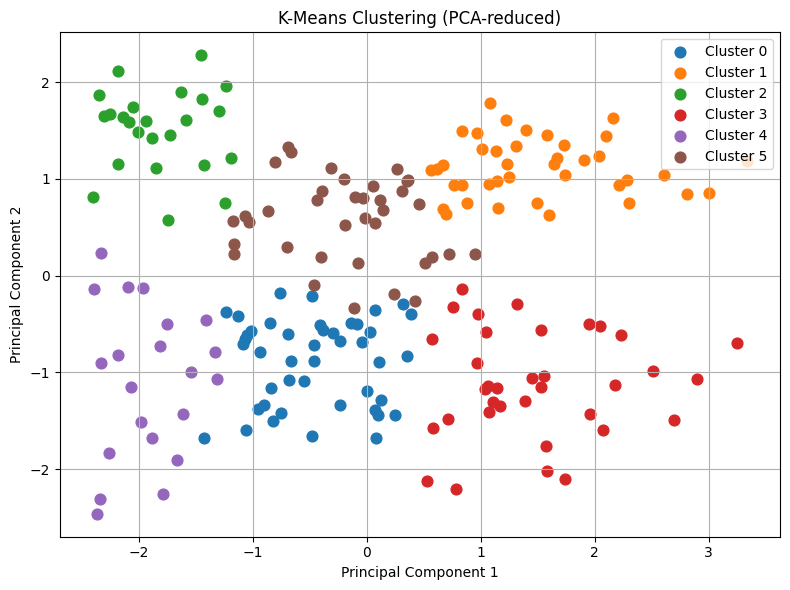

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality to 2 components for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

# Create a DataFrame for the components and cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Plot
plt.figure(figsize=(8, 6))
for cluster in sorted(pca_df['Cluster'].unique()):
    subset = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', s=60)

plt.title('K-Means Clustering (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
import joblib

# Save the trained KMeans model to a file
joblib.dump(kmeans, 'kmeans_model_for_Customer_Segmentation.pkl')


['kmeans_model_for_Customer_Segmentation.pkl']

In [20]:
from google.colab import files

# Download the file to your local machine
files.download('kmeans_model_for_Customer_Segmentation.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>